In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('height.csv')

In [3]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<AxesSubplot: xlabel='Height', ylabel='Count'>

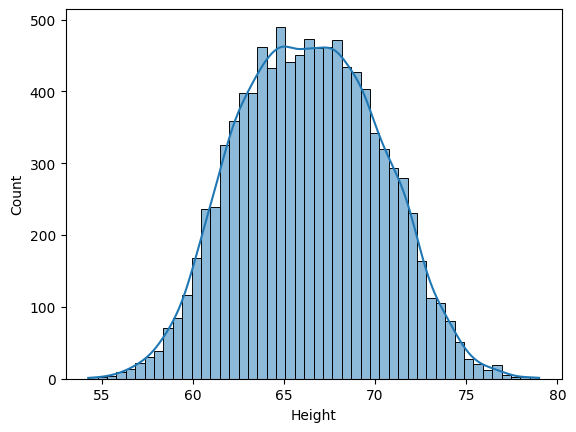

In [4]:
sns.histplot(df['Height'],kde=True)

In [5]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [6]:
df.shape

(10000, 3)

# Normal distribution

In [7]:
mean = df.Height.mean()
mean

66.36755975482124

In [8]:
std = df.Height.std()
std

3.8475281207732293

In [9]:
mean + 3*std

77.91014411714093

In [10]:
mean - 3*std

54.82497539250156

In [11]:
df[(df.Height<54.82497539250156)|(df.Height>77.91014411714093)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [12]:
no_outlier = df[(df.Height>54.82497539250156) & (df.Height<77.91014411714093)]
no_outlier.shape

(9993, 3)

# Z Score

In [13]:
df['zscore'] = (df.Height-df.Height.mean())/df.Height.std()

In [14]:
df

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375
...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658
9996,Female,67.067155,170.867906,0.181830
9997,Female,63.867992,128.475319,-0.649655
9998,Female,69.034243,163.852461,0.693090


In [4]:
(73.847017-66.36755975482124)/3.847528

1.9439643441655916

In [16]:
df[(df.zscore>3)|(df.zscore<-3)]

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [17]:
rem_outlier = df[(df.zscore<3) & (df.zscore>-3)]
rem_outlier.shape

(9993, 4)

<AxesSubplot: ylabel='Count'>

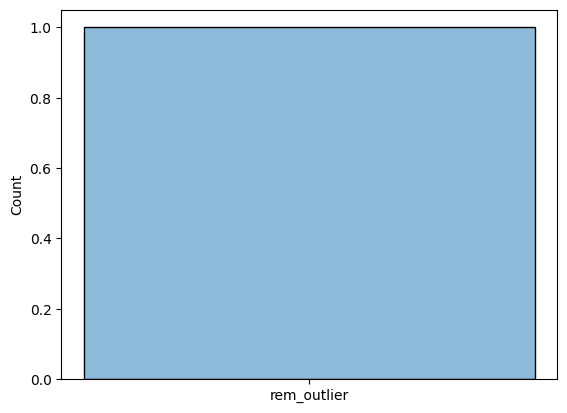

In [4]:
sns.histplot(['rem_outlier'],kde=True)

# Weight
 normal distribution

In [19]:
df.Weight.describe()

count    10000.000000
mean       161.440357
std         32.108439
min         64.700127
25%        135.818051
50%        161.212928
75%        187.169525
max        269.989699
Name: Weight, dtype: float64

In [20]:
mean = df.Weight.mean()
mean

161.44035683283076

In [21]:
std = df.Weight.std()
std

32.108439006519596

In [22]:
mean + 3*std

257.76567385238957

In [23]:
mean - 3*std

65.11503981327198

In [24]:
df[(df.Weight>257.76567385238957)|(df.Weight<65.11503981327198)]

,Gender,Height,Weight,zscore
2014,Male,78.998742,269.989699,3.282934
9285,Female,54.263133,64.700127,-3.146027


In [25]:
removal_outlier=df[(df.Weight<257.76567385238957) & (df.Weight>65.11503981327198)]

In [26]:
removal_outlier.shape

(9998, 4)

# Z score

In [27]:
df['zwscore']= (df.Weight-df.Weight.mean())/df.Weight.std()

In [28]:
df

,Gender,Height,Weight,zscore,zwscore
0,Male,73.847017,241.893563,1.943964,2.505672
1,Male,68.781904,162.310473,0.627505,0.027099
2,Male,74.110105,212.740856,2.012343,1.597726
3,Male,71.730978,220.042470,1.393991,1.825131
4,Male,69.881796,206.349801,0.913375,1.398680
...,...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658,-0.768113
9996,Female,67.067155,170.867906,0.181830,0.293616
9997,Female,63.867992,128.475319,-0.649655,-1.026678
9998,Female,69.034243,163.852461,0.693090,0.075124


In [29]:
df[(df.zwscore>3)|(df.zwscore<-3)]

,Gender,Height,Weight,zscore,zwscore
2014,Male,78.998742,269.989699,3.282934,3.380711
9285,Female,54.263133,64.700127,-3.146027,-3.012922


In [30]:
filt_outlier=df[(df.zwscore<3)&(df.zwscore>-3)]
filt_outlier.shape

(9998, 5)